# "Maximizing Engagement: Predictive Modeling for Click-Through Rates in Advertising"

## **Objective:**
In advertising, knowing which people are likely to click on ads is super important. Predicting this helps companies pick out the best visitors who are most likely to interact with ads. They do this by checking what users have looked at online and showing ads that match their interests

Getting this right is a big deal for ad companies because it determines how successful their online ads will be. Knowing how users react to ads is really valuable. It helps companies pick ads that suit each person.

The main goal of this challenge is to make a smart computer program that can guess which users will click on ads and make money for the advertising company.

In [ ]:
#Loading libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd

# To Read the CSV file into a DataFrame and assign it to the variable 'df'
df = pd.read_csv('/content/advertising.csv')

# Display the first few rows of the DataFrame
df.head()



,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [ ]:
# Extracting object type columns
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)
print("Total number of categorical columns are ", len(objects_lst),":",objects_lst)

# Extracting int64 type columns
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
print("Total number of numerical columns are ", len(int64_lst),":",int64_lst)

# Extracting float64 type columns
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)
print("Total number of float64 columns are ", len(float64_lst),":",float64_lst )



Total number of categorical columns are  5 : ['Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp']
Total number of numerical columns are  1 : ['Clicked on Ad']
Total number of float64 columns are  4 : ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']


In [ ]:
df['Clicked on Ad'].value_counts()

0    5083
1    4917
Name: Clicked on Ad, dtype: int64

In [ ]:
df = df.drop(['Ad Topic Line', 'City','Country', 'Timestamp'],axis=1)

In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [ ]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)

In [ ]:
import pandas as pd

def skew_analysis(df):
    skewness_values = []

    for column in df.columns:
        skew_value = df[column].skew()
        if skew_value > 0:
            skewness = "positive (+ve) skewed"
        elif skew_value == 0:
            skewness = "normal distribution"
        else:
            skewness = "negative (-ve) skewed"

        skewness_values.append([column, round(skew_value, 4), skewness])

    skewness_df = pd.DataFrame(skewness_values, columns=['column', 'skewness_value', 'skewness'])

    skewness_counts = skewness_df['skewness'].value_counts().reset_index()
    skewness_counts.columns = ['skewness', 'count']

    return skewness_df, skewness_counts


skew_df, skew_total_df = skew_analysis(df)
print("Skewness Counts:")
print(skew_total_df)
print("\nSkewness Details:")
print(skew_df)


Skewness Counts:
                skewness  count
0  positive (+ve) skewed      5
1  negative (-ve) skewed      1

Skewness Details:
                     column  skewness_value               skewness
0  Daily Time Spent on Site          0.0700  positive (+ve) skewed
1                       Age          0.3563  positive (+ve) skewed
2               Area Income         -0.4941  negative (-ve) skewed
3      Daily Internet Usage          0.0007  positive (+ve) skewed
4                    Gender          0.1508  positive (+ve) skewed
5             Clicked on Ad          0.0332  positive (+ve) skewed


In [ ]:
df['AREA_INCOME'] = np.square(df['Area Income'])
df['AREA_INCOME'].skew()

0.04290595002203702

In [ ]:
df = df.drop(['Area Income'],axis=1)


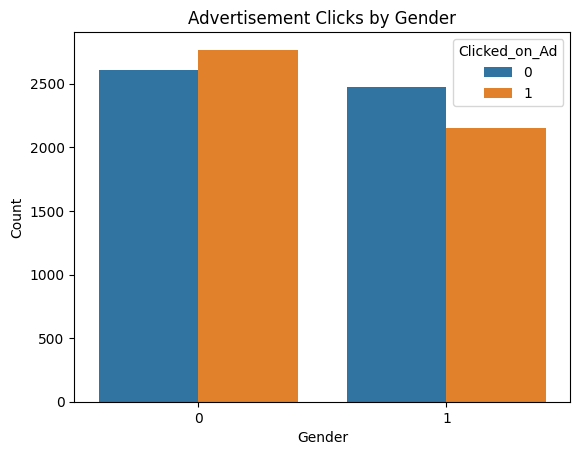

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing 'Gender' and 'Clicked_on_Ad' columns

# Create count plot for 'Gender' and 'Clicked_on_Ad' columns
sns.countplot(x=df['Gender'], hue=df['Clicked on Ad'])

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Advertisement Clicks by Gender')

# Optionally, set legend
plt.legend(title='Clicked_on_Ad', loc='upper right')

plt.show()



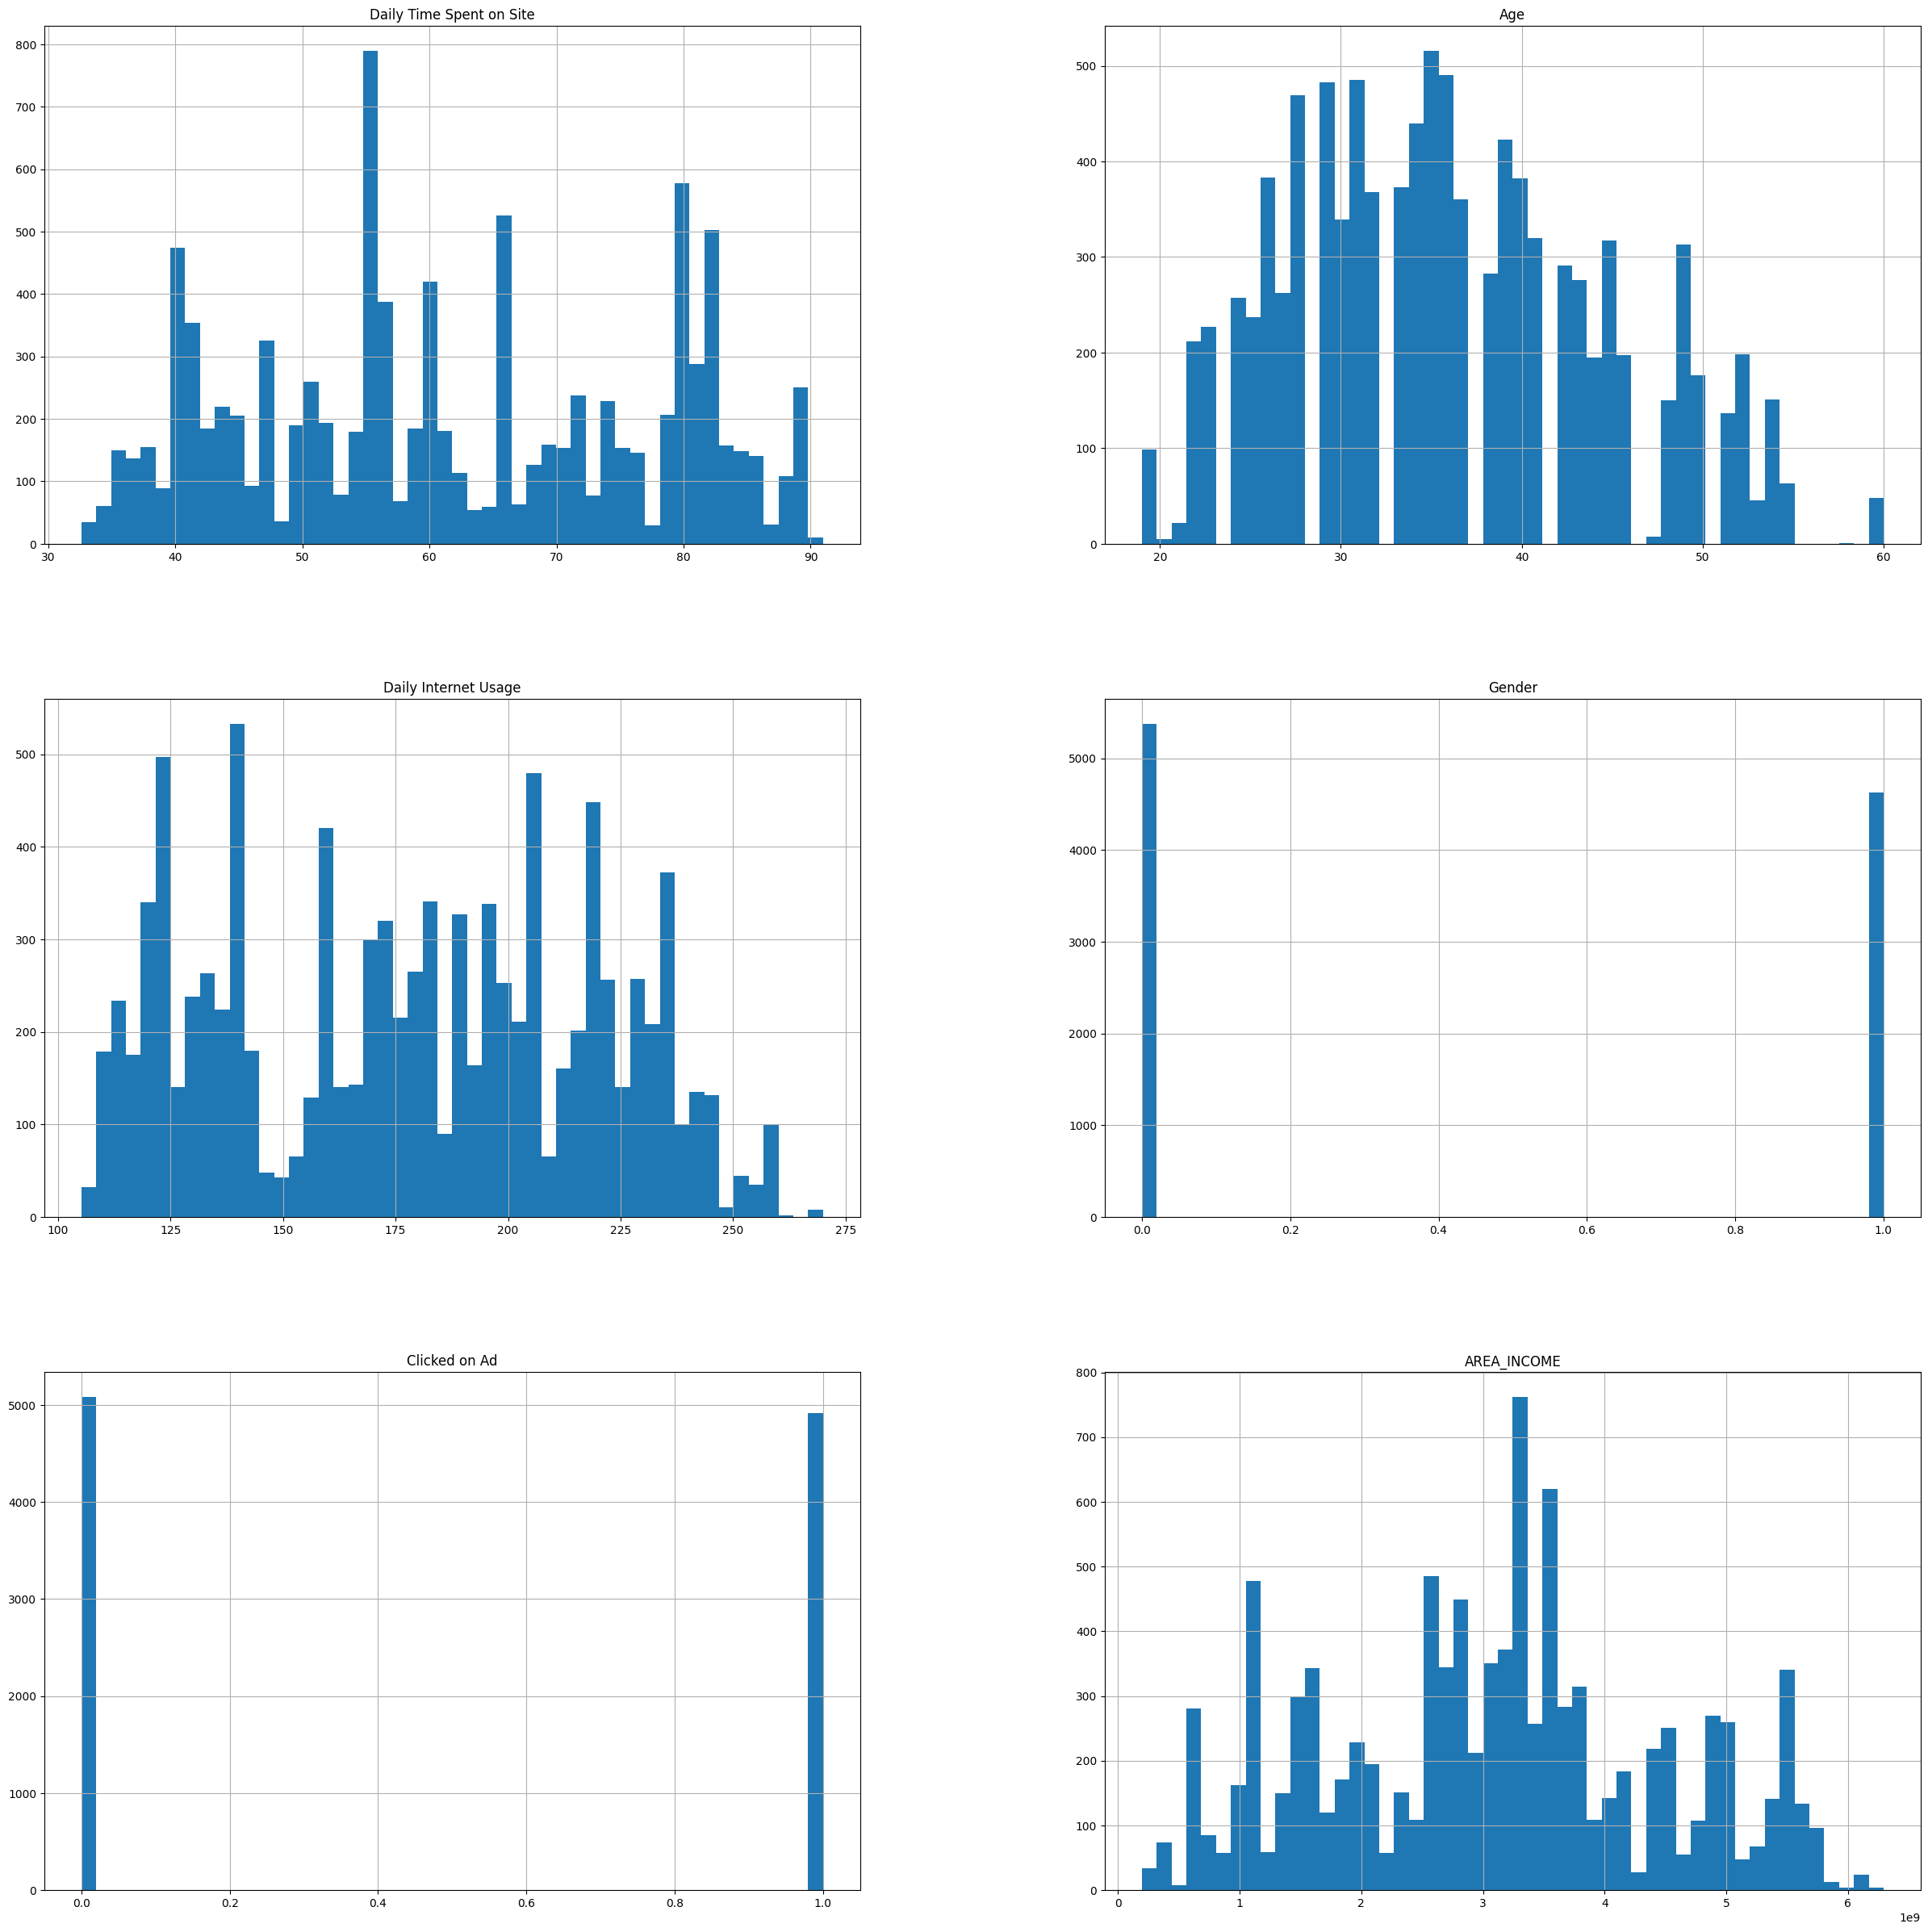

In [ ]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,30))
plt.show()

In [ ]:
import pandas as pd
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
for column in numeric_columns:
    print(f"Skewness for '{column}': {df[column].skew()}")


Skewness for 'Daily Time Spent on Site': 0.07001333101620606
Skewness for 'Age': 0.3562754676984694
Skewness for 'Daily Internet Usage': 0.0007494935957058393
Skewness for 'Gender': 0.15084969959033953
Skewness for 'Clicked on Ad': 0.033209556882693315
Skewness for 'AREA_INCOME': 0.04290595002203702


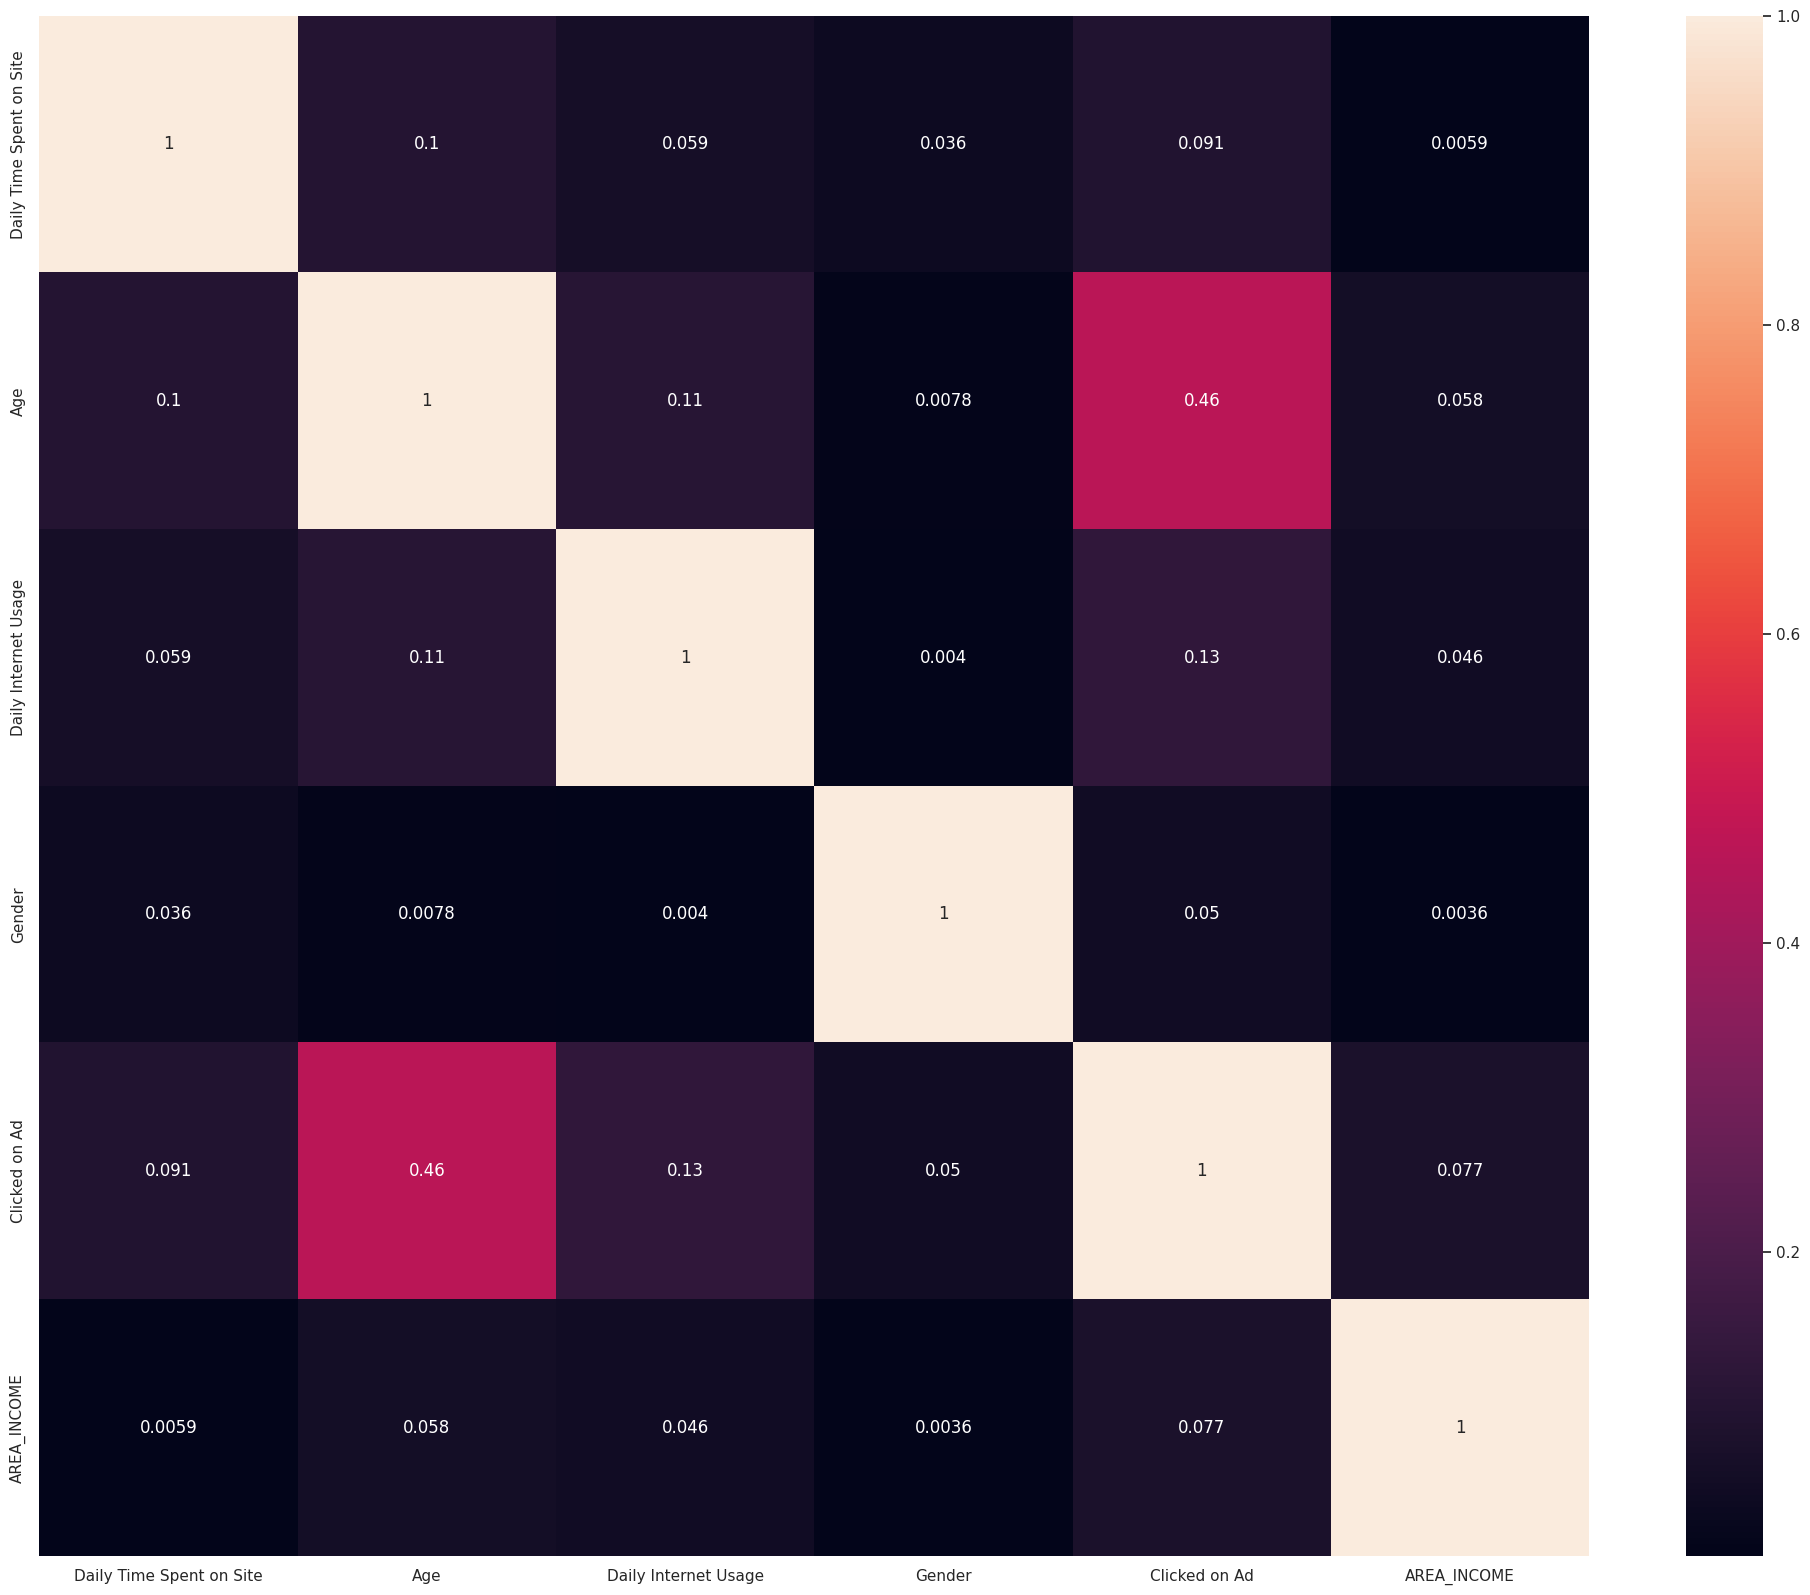

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (25, 20)})  # Set custom figure size
corr = df.corr().abs()  # Calculate absolute correlation values
sns.heatmap(corr, annot=True)  # Create heatmap with annotations
plt.show()  # Display the plot


In [ ]:
# Defining alternative variable names for target and features
target_column = 'Clicked on Ad'

# Assigning feature columns to 'features' and the target column to 'target'
X = df.drop(columns=target_column)
y = df[target_column]


In [ ]:
print(df.columns)

Index(['Daily Time Spent on Site', 'Age', 'Daily Internet Usage', 'Gender',
       'Clicked on Ad', 'AREA_INCOME'],
      dtype='object')


In [ ]:
# Check the shape of X and y variable
X.shape, y.shape

((10000, 5), (10000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import matplotlib.pyplot as plt

# Initialize models
xgb_model = xgb.XGBClassifier()
lgb_model = lgb.LGBMClassifier()
cb_model = cb.CatBoostClassifier()

# Train models
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
cb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict using trained models
xgb_pred = xgb_model.predict(X_test)
lgb_pred = lgb_model.predict(X_test)
cb_pred = cb_model.predict(X_test)

# Calculate accuracy for each model
xgb_accuracy = accuracy_score(y_test, xgb_pred)
lgb_accuracy = accuracy_score(y_test, lgb_pred)
cb_accuracy = accuracy_score(y_test, cb_pred)

# Calculate precision for each model
xgb_precision = precision_score(y_test, xgb_pred)
lgb_precision = precision_score(y_test, lgb_pred)
cb_precision = precision_score(y_test, cb_pred)

# Calculate recall for each model
xgb_recall = recall_score(y_test, xgb_pred)
lgb_recall = recall_score(y_test, lgb_pred)
cb_recall = recall_score(y_test, cb_pred)

# Calculate F1-score for each model
xgb_f1 = f1_score(y_test, xgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)
cb_f1 = f1_score(y_test, cb_pred)

# Print the calculated metrics
print("XGBoost Metrics:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1-Score: {xgb_f1}")
print("\n")

print("LightGBM Metrics:")
print(f"Accuracy: {lgb_accuracy}")
print(f"Precision: {lgb_precision}")
print(f"Recall: {lgb_recall}")
print(f"F1-Score: {lgb_f1}")
print("\n")

print("CatBoost Metrics:")
print(f"Accuracy: {cb_accuracy}")
print(f"Precision: {cb_precision}")
print(f"Recall: {cb_recall}")
print(f"F1-Score: {cb_f1}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3931, number of negative: 4069
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 740
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491375 -> initscore=-0.034503
[LightGBM] [Info] Start training from score -0.034503
XGBoost Metrics:
Accuracy: 0.793
Precision: 0.8095238095238095
Recall: 0.7586206896551724
F1-Score: 0.7832460732984293


LightGBM Metrics:
Accuracy: 0.794
Precision: 0.8072805139186295
Recall: 0.7647058823529411
F1-Score: 0.7854166666666668


CatBoost Metrics:
Accuracy: 0.803
Precision:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


# Initialize the KNN classifier (you can set the number of neighbors 'n_neighbors' as needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  # Calculate the F1-score
print("KNeighborsClassifier")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


KNeighborsClassifier
Accuracy: 0.7635
Precision: 0.7669094693028096
Recall: 0.7474645030425964
F1-Score: 0.7570621468926555


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
# Assuming 'features' and 'target' are your data
# Split the data into training and test sets (change test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier (you can set the number of trees 'n_estimators' as needed)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Example with 100 trees

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("RandomForestClassifier")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


RandomForestClassifier
Accuracy: 0.7775
Precision: 0.7832460732984293
Recall: 0.7586206896551724
F1-Score: 0.7707367336424523


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score
# Define the parameters grid to search through
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    # Add more hyperparameters to tune here...
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Create GridSearchCV object with the defined parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object on your training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters found
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Predict using the best model on the test set
predictions = best_model.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("GridSearchCV")
print("Best Accuracy Score:", best_score)
print("Test Accuracy with Best Model:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


GridSearchCV
Best Accuracy Score: 0.798875
Test Accuracy with Best Model: 0.7775
Precision: 0.8189563365282215
Recall: 0.7799188640973631
F1-Score: 0.798961038961039


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Apply SMOTE to resample the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define base models
base_models = [
    ('xgb', xgb.XGBClassifier()),
    ('lgbm', lgb.LGBMClassifier()),
    ('catboost', cb.CatBoostClassifier())
]

# Initialize logistic regression
logistic_regression = LogisticRegression()

# Define parameter grid for logistic regression
param_grid = {
    'stackingclassifier__final_estimator__C': [0.1, 1.0, 10.0],
    'stackingclassifier__final_estimator__solver': ['liblinear', 'lbfgs']
    # Add more parameters to tune here...
}

# Create SMOTE pipeline with the stacking classifier
smote_pipeline = make_imb_pipeline(SMOTE(random_state=42), StackingClassifier(estimators=base_models, final_estimator=logistic_regression, cv=5))

# Initialize GridSearchCV for the entire pipeline
grid_search = GridSearchCV(estimator=smote_pipeline, param_grid=param_grid, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'], refit='accuracy', n_jobs=-1)

# Fit GridSearchCV on resampled data
grid_search.fit(X_train, y_train)

# Get the best stacking model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print the evaluation metrics
print("Stacking Classifier Metrics:")
print(f"Test Accuracy with Best Model: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")





Streaming output truncated to the last 5000 lines.
9:	learn: 0.6355570	total: 31.2ms	remaining: 3.09s
10:	learn: 0.6309363	total: 34.3ms	remaining: 3.08s
11:	learn: 0.6268813	total: 37.6ms	remaining: 3.09s
12:	learn: 0.6238515	total: 39.8ms	remaining: 3.02s
13:	learn: 0.6199308	total: 43ms	remaining: 3.03s
14:	learn: 0.6161097	total: 46ms	remaining: 3.02s
15:	learn: 0.6127309	total: 49ms	remaining: 3.02s
16:	learn: 0.6094068	total: 52.1ms	remaining: 3.01s
17:	learn: 0.6062616	total: 55.2ms	remaining: 3.01s
18:	learn: 0.6029413	total: 58.3ms	remaining: 3.01s
19:	learn: 0.6001419	total: 61.4ms	remaining: 3.01s
20:	learn: 0.5974462	total: 64.8ms	remaining: 3.02s
21:	learn: 0.5945852	total: 71.1ms	remaining: 3.16s
22:	learn: 0.5919044	total: 74.3ms	remaining: 3.15s
23:	learn: 0.5893803	total: 77.4ms	remaining: 3.15s
24:	learn: 0.5871475	total: 80.6ms	remaining: 3.14s
25:	learn: 0.5845265	total: 83.9ms	remaining: 3.14s
26:	learn: 0.5821945	total: 87.1ms	remaining: 3.14s
27:	learn: 0.5807007

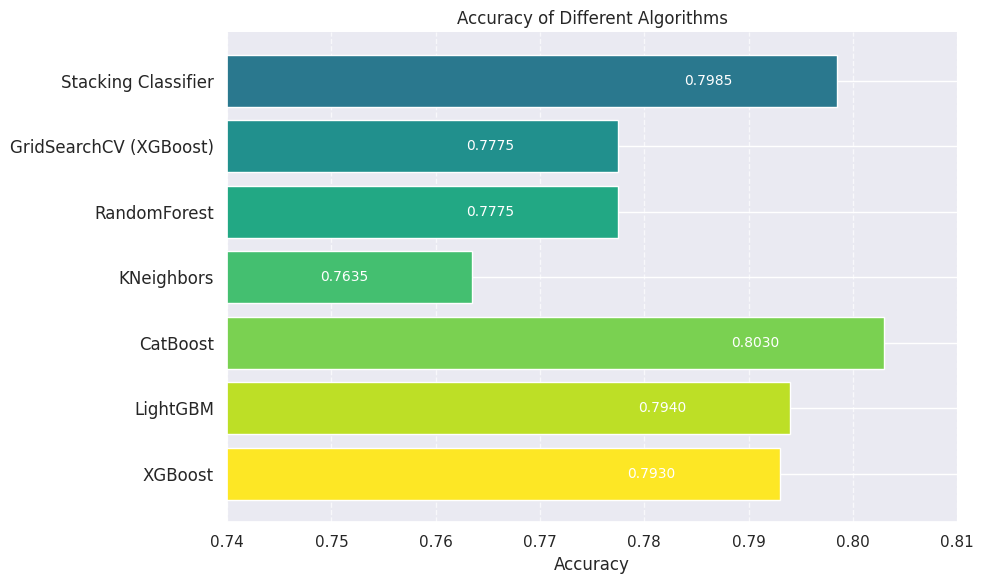

In [ ]:
import matplotlib.pyplot as plt

# Define the algorithms and their updated accuracies
algorithms = [
    'XGBoost', 'LightGBM', 'CatBoost', 'KNeighbors', 'RandomForest',
    'GridSearchCV (XGBoost)', 'Stacking Classifier'
]

accuracies = [0.793, 0.794, 0.803, 0.7635, 0.7775, 0.7775, 0.7985]  # Updated accuracy values

# Create a color palette for the bars
colors = plt.cm.viridis_r([0.1 * i for i in range(len(algorithms))])

# Create a horizontal bar plot with updated accuracies
plt.figure(figsize=(10, 6))
bars = plt.barh(algorithms, accuracies, color=colors)

# Adding data labels on the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_width() - 0.01, bar.get_y() + bar.get_height() / 2, f'{accuracy:.4f}',
             va='center', ha='right', color='white', fontsize=10)

plt.xlabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.xlim(0.74, 0.81)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Customizing ticks and spines
plt.tick_params(axis='y', labelsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


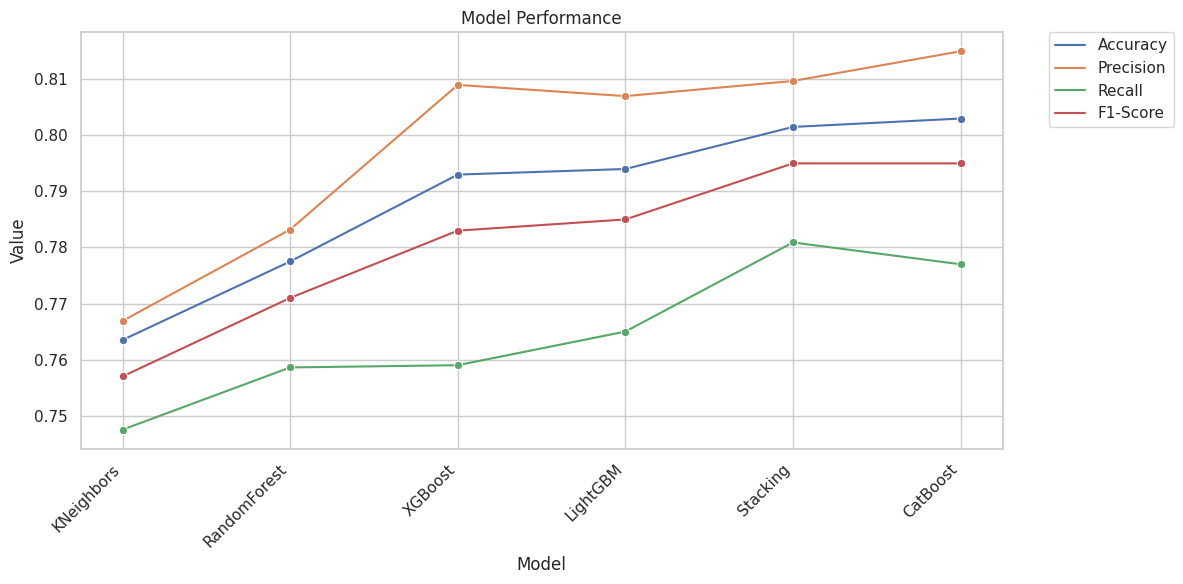

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define model names and corresponding metric values
models = ['XGBoost', 'LightGBM', 'CatBoost', 'KNeighbors', 'RandomForest', 'Stacking']
accuracies = [0.793, 0.794, 0.803, 0.7635, 0.7775, 0.8015]
precisions = [0.809, 0.807, 0.815, 0.7669, 0.7832, 0.8097]
recalls = [0.759, 0.765, 0.777, 0.7475, 0.7586, 0.7809]
f1_scores = [0.783, 0.785, 0.795, 0.757, 0.771, 0.795]

# Create a DataFrame
data = {
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
}

df = pd.DataFrame(data)

# Sort models based on accuracy in ascending order
df_sorted = df.sort_values(by='Accuracy')

# Melt the DataFrame to long format for visualization
df_sorted_melted = df_sorted.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Set a style for the plot
sns.set(style="whitegrid")

# Visualizing with Seaborn - Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model', y='Value', hue='Metric', data=df_sorted_melted, marker='o')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation and alignment of x-axis labels
plt.title('Model Performance')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.show()
